In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install pmdarima

   ---------------------------------------- 0.0/613.3 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/613.3 kB ? eta -:--:--
   ---------------------------------------- 613.3/613.3 kB 5.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --------------------------------- ------ 2.4/2.8 MB 11.2 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 10.8 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 5.7 MB/s eta 0:00:00


In [3]:
df = pd.read_csv('Datasets/airline_passengers.csv', index_col='Month', parse_dates=True)

In [4]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df['LogPassengers'] = np.log(df['Passengers'])

In [6]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [7]:
import pmdarima as pm

In [8]:
model = pm.auto_arima(train['Passengers'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=6.43 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=1.36 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=1.08 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=2.72 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.96 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=1.12 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=9.44 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=1.44 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=2.12 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.72 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=1.40 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Sat, 21 Sep 2024   AIC                            905.686
Time:                                    18:02:38   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

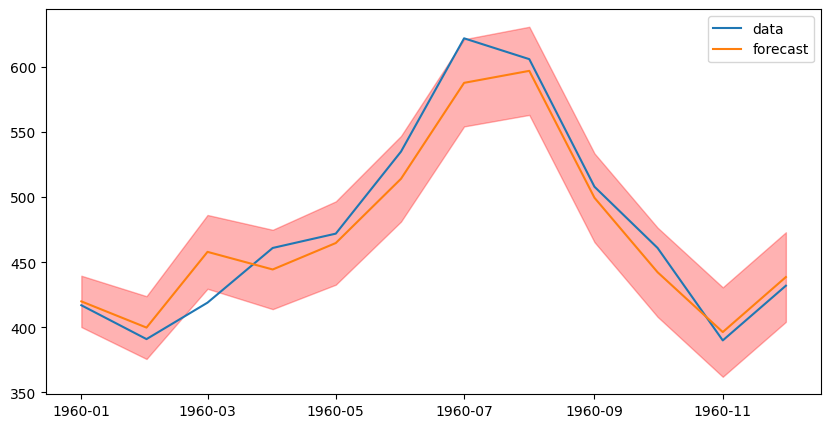

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

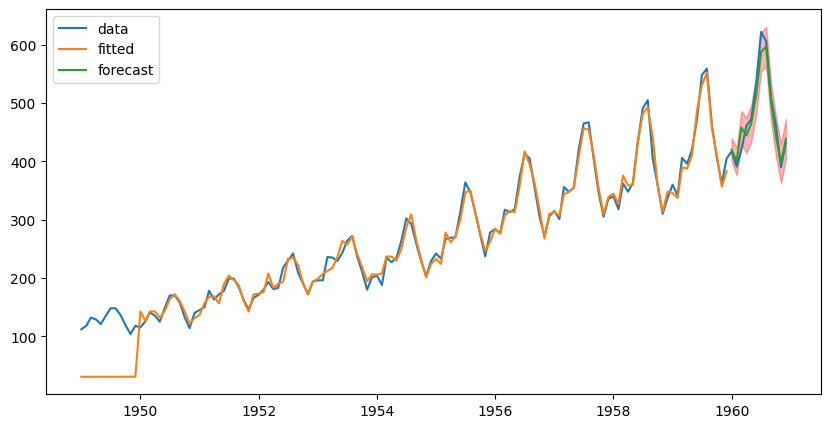

In [12]:
train_pred = model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [13]:
logmodel = pm.auto_arima(train['LogPassengers'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-439.110, Time=6.48 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=2.64 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=2.36 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.03 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.326, Time=7.71 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.782, Time=1.94 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.330, Time=11.71 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.715, Time=5.44 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=9.31 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.574, Time=3.87 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=1.29 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-441.328, Time=4.46 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.344, Time=8.80 sec
 ARIMA(1,0,2)(1,1,0)[12

In [14]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Sat, 21 Sep 2024   AIC                           -448.052
Time:                                      18:06:01   BIC                           -434.114
Sample:                                  01-01-1949   HQIC                          -442.392
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0192      0.009      2.150      0.032       0.002       0.037
ar.L1          0.6007      0.083      7.280      0.000       0.439       0.762
ar.L2          0.2417      0.085      2.854      0.004       0.076       0.408
ma.S.L12      -0.5670      0.105     -5.418      0.000      -0.772      -0.362
sigma2         0.0012      0.000      8.193      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.06
Prob(Q):                              0.99   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

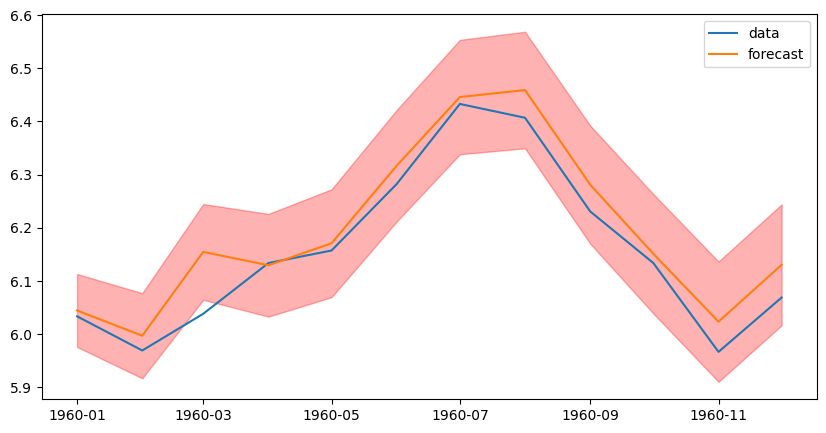

In [15]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

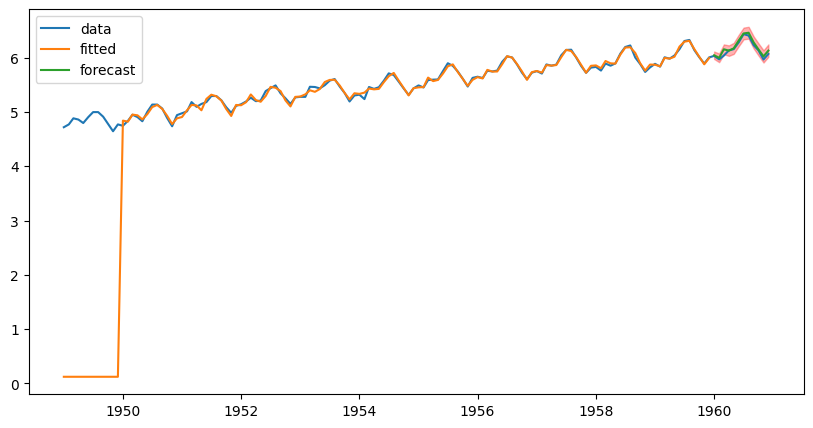

In [16]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [17]:
### forecast RMSE
def rmse(t, y):
  return np.sqrt(np.mean((t - y)**2))

In [18]:
print("Non-logged RMSE:", rmse(test['Passengers'], test_pred))
print("Logged RMSE:", rmse(test['Passengers'], np.exp(test_pred_log)))

Non-logged RMSE: 18.536469014046745
Logged RMSE: 23.03129977633835


In [19]:
### non-seasonal
model = pm.auto_arima(train['LogPassengers'],
                      trace=True,
                      suppress_warnings=True,
                      d=0,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=False,
                      seasonal=False)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=826.758, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.48 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.97 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-209.510, Time=0.81 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-211.836, Time=1.75 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=1.32 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-209.641, Time=1.92 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-207.056, Time=2.40 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=3.12 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-206.409, Time=2.31 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-211.090, Time=2.77 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=3.46 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=3.35 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=3.73 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 0, 2)   Log Likelihood                 167.379
Date:                Sat, 21 Sep 2024   AIC                           -304.757
Time:                        18:09:37   BIC                           -261.515
Sample:                    01-01-1949   HQIC                          -287.186
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0366      0.078      0.467      0.641      -0.117       0.190
ar.L2          0.1768      0.096      1.844      0.065      -0.011       0.365
ar.L3          0.1314      0.097      1.357      0.175      -0.058       0.321
ar.L4         -0.1259      0.078     -1.619      0.105      -0.278       0.026
ar.L5          0.0366      0.076      0.482      0.630      -0.112       0.185
ar.L6          0.0862      0.081      1.063      0.288      -0.073       0.245
ar.L7         -0.0053      0.084     -0.063      0.950      -0.171       0.160
ar.L8         -0.0946      0.085     -1.116      0.264      -0.261       0.072
ar.L9         -0.0481      0.078     -0.619      0.536      -0.200       0.104
ar.L10         0.0982      0.071      1.376      0.169      -0.042       0.238
ar.L11        -0.0642      0.079     -0.817      0.414      -0.218       0.090
ar.L12         0.7721      0.079      9.763      0.000       0.617       0.927
ma.L1          0.9375      0.097      9.620      0.000       0.747       1.129
ma.L2          0.6251      0.083      7.500      0.000       0.462       0.788
sigma2         0.0037      0.001      6.986      0.000       0.003       0.005
===================================================================================
Ljung-Box (L1) (Q):                   3.05   Jarque-Bera (JB):                 1.31
Prob(Q):                              0.08   Prob(JB):                         0.52
Heteroskedasticity (H):               0.51   Skew:                             0.23
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

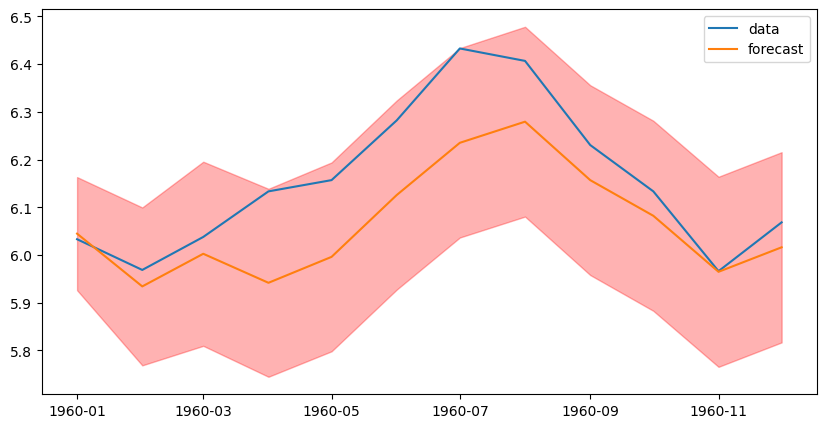

In [21]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

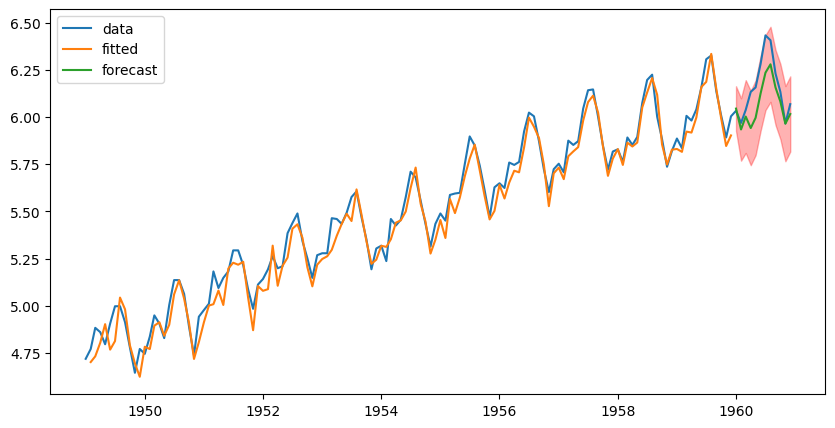

In [22]:
train_pred = model.predict_in_sample(start=1, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index[1:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [23]:
rmse(test['Passengers'], np.exp(test_pred))

56.14129773110328

In [24]:
### non-seasonal non-logged
model = pm.auto_arima(train['Passengers'],
                      trace=True,
                      suppress_warnings=True,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=False,
                      seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1277.589, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1264.738, Time=0.58 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1262.608, Time=0.71 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1268.313, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1258.440, Time=0.76 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1263.896, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1218.683, Time=2.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1261.216, Time=0.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.36 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1254.439, Time=0.75 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1245.588, Time=2.28 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.94 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept  

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 2)   Log Likelihood                -494.031
Date:                Sat, 21 Sep 2024   AIC                           1020.062
Time:                        18:12:42   BIC                           1066.065
Sample:                    01-01-1949   HQIC                          1038.755
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.1064      3.023      2.020      0.043       0.182      12.030
ar.L1         -0.0766      0.143     -0.536      0.592      -0.357       0.204
ar.L2         -0.2994      0.142     -2.113      0.035      -0.577      -0.022
ar.L3         -0.1340      0.117     -1.149      0.251      -0.363       0.095
ar.L4         -0.2843      0.115     -2.482      0.013      -0.509      -0.060
ar.L5         -0.0920      0.116     -0.791      0.429      -0.320       0.136
ar.L6         -0.3053      0.112     -2.716      0.007      -0.526      -0.085
ar.L7         -0.1006      0.124     -0.814      0.416      -0.343       0.142
ar.L8         -0.3147      0.120     -2.624      0.009      -0.550      -0.080
ar.L9         -0.0835      0.120     -0.695      0.487      -0.319       0.152
ar.L10        -0.3179      0.129     -2.470      0.014      -0.570      -0.066
ar.L11        -0.0756      0.130     -0.583      0.560      -0.330       0.178
ar.L12         0.6366      0.126      5.059      0.000       0.390       0.883
ma.L1         -0.0960      0.157     -0.610      0.542      -0.404       0.212
ma.L2          0.2345      0.185      1.266      0.205      -0.128       0.598
sigma2        97.8893     15.342      6.381      0.000      67.820     127.959
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                13.04
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               1.86   Skew:                            -0.19
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

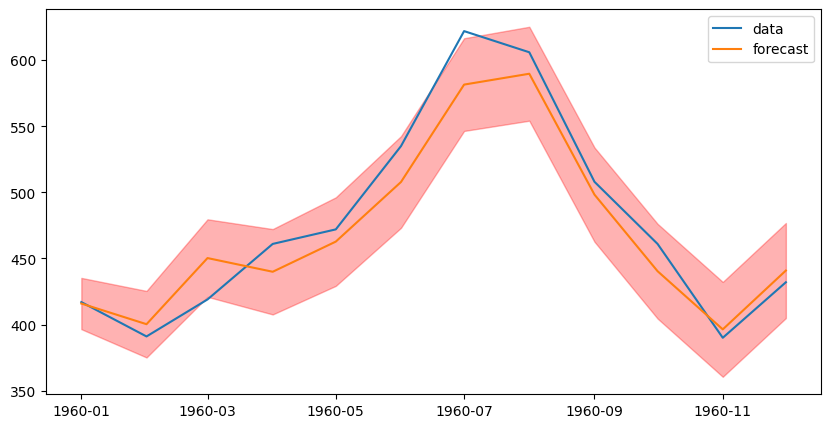

In [26]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [27]:
rmse(test['Passengers'], test_pred)

20.150856737851274